In [1]:
import pandas as pd
loan = pd.read_csv('loan_data.csv')
final_loan = loan.copy()

In [2]:
final_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
final_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
target_count = final_loan['not.fully.paid'].value_counts(dropna = False)
target_count


0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [5]:
from imblearn.pipeline import Pipeline

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [7]:
numeric_features = ['credit.policy','int.rate',
                    'installment','log.annual.inc','dti','fico',
                    'days.with.cr.line','revol.bal','revol.util',
                    'inq.last.6mths','delinq.2yrs','pub.rec']
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree = 2)),
                                      ('scaler', StandardScaler())])

In [8]:
categorical_features = ['purpose']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [10]:
from imblearn.over_sampling import SMOTE



In [11]:
#smt = SMOTE(random_state=42, ratio = 'minority')
smt = SMOTE(random_state=42, sampling_strategy=0.6)
lor = LogisticRegression(C = 50)

In [12]:
clf = Pipeline([('preprocessor', preprocessor),('smt', smt),
                ('lor',lor)])

In [13]:
y = final_loan['not.fully.paid']
X = final_loan.drop('not.fully.paid', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state = 42,stratify = y )
clf.fit(X_train, y_train)
#X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_values_full, Y_values, test_size = 0.33, random_state = 42, )


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['credit.policy', 'int.rate',
                                                   'installment',
                                                   'log.annual.inc', 'dti',
                                                   'fico', 'days.with.cr.line',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'delinq.2yrs', 'pub.rec']),
                                                 ('c

In [14]:
clf.score(X_train, y_train)

0.7812061711079944

In [15]:
clf.score(X_test, y_test)

0.7636823789939893

In [16]:
 y_test

2118    0
8084    0
3984    0
7998    0
4363    0
       ..
3314    1
3618    0
6039    0
2660    1
2573    0
Name: not.fully.paid, Length: 3161, dtype: int64

In [17]:
 y_train

2389    0
5699    0
795     0
2290    0
9474    0
       ..
7672    0
8576    0
2257    1
2876    0
4303    0
Name: not.fully.paid, Length: 6417, dtype: int64

In [18]:
X.shape

(9578, 13)

In [19]:
y.shape

(9578,)

In [20]:
X.shape[0] 

9578

In [21]:
 y.shape[0]

9578

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
confusion = confusion_matrix(y_test,  y_test)
confusion

array([[2655,    0],
       [   0,  506]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2655
           1       1.00      1.00      1.00       506

    accuracy                           1.00      3161
   macro avg       1.00      1.00      1.00      3161
weighted avg       1.00      1.00      1.00      3161



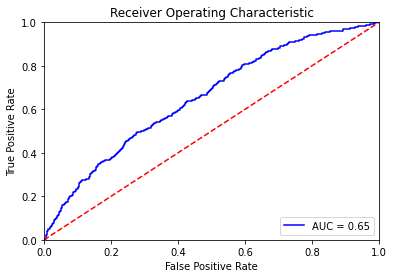

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()